# Dados preprocessados

In [1]:
import numpy as np
import pandas as pd

import models.pipelineLibrary
import models.utilsCode

In [2]:
#Parameters
seed = 1

input_filename = '../../dados_anon_fulldataset.csv'
# input_filename = "../../dados100.csv"


In [3]:
models.utilsCode.set_seed(seed)

In [4]:
df = pd.read_csv(input_filename)

In [5]:
df = df.drop(columns=['Unnamed: 0'])\
        .drop_duplicates()\
        .copy()

In [6]:
# Preprocess
time_series_dataframe, np_estatico, labels = models.pipelineLibrary.pipe_default.fit_transform(df)
np_series_lstm = models.pipelineLibrary.pipe_lstm.fit_transform(time_series_dataframe)

np_dinamico_linear = np_series_lstm.reshape(np_series_lstm.shape[0],-1)

np_data = np.concatenate((np_estatico,np_dinamico_linear),axis=1)


In [7]:
print(np_series_lstm.shape)

print(np_dinamico_linear.shape)
print(np_estatico.shape)

(24890, 4, 26)
(24890, 104)
(24890, 14)


In [8]:
where_are_NaNs = np.isnan(np_data)
np_data[where_are_NaNs] = 0
x = np_data

x

array([[ 0.3928947 , -1.54355224, -0.13791766, ..., -0.26266631,
        -2.14787714,  0.99860985],
       [ 1.77293353, -1.54355224, -0.13791766, ..., -1.06925628,
        -1.63203638,  0.99860985],
       [-0.06711824, -1.33926453, -0.13791766, ..., -1.06925628,
        -1.97593022,  0.99860985],
       ...,
       [-0.06711824, -0.47877993, -0.13791766, ...,  0.34227616,
         0.6032736 ,  0.99860985],
       [ 0.85290764, -0.47877993, -0.13791766, ..., -1.06925628,
         0.77522052, -1.00138203],
       [ 0.3928947 , -0.72021087, -0.13791766, ..., -0.86760879,
         0.77522052, -1.00138203]])

In [9]:
from sklearn.manifold import TSNE

tsne_evasao = TSNE(n_components=2, n_iter=1000, perplexity=100, verbose=2).fit_transform(x)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 24890 samples in 1.005s...
[t-SNE] Computed neighbors for 24890 samples in 280.940s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24890
[t-SNE] Computed conditional probabilities for sample 2000 / 24890
[t-SNE] Computed conditional probabilities for sample 3000 / 24890
[t-SNE] Computed conditional probabilities for sample 4000 / 24890
[t-SNE] Computed conditional probabilities for sample 5000 / 24890
[t-SNE] Computed conditional probabilities for sample 6000 / 24890
[t-SNE] Computed conditional probabilities for sample 7000 / 24890
[t-SNE] Computed conditional probabilities for sample 8000 / 24890
[t-SNE] Computed conditional probabilities for sample 9000 / 24890
[t-SNE] Computed conditional probabilities for sample 10000 / 24890
[t-SNE] Computed conditional probabilities for sample 11000 / 24890
[t-SNE] Computed conditional probabilities for sample 12000 / 24890
[t-SNE] Computed conditional probabilities for 

In [10]:
tsne_evasao_df = pd.DataFrame(data = tsne_evasao,
                              columns = ['x', 'y'])

tsne_evasao_df.tail()

,x,y
24885,-41.020084,-19.652939
24886,-38.034687,-16.570740
24887,-19.369366,-5.007585
24888,39.959618,22.587383
24889,35.893810,3.582186


<Figure size 432x288 with 0 Axes>

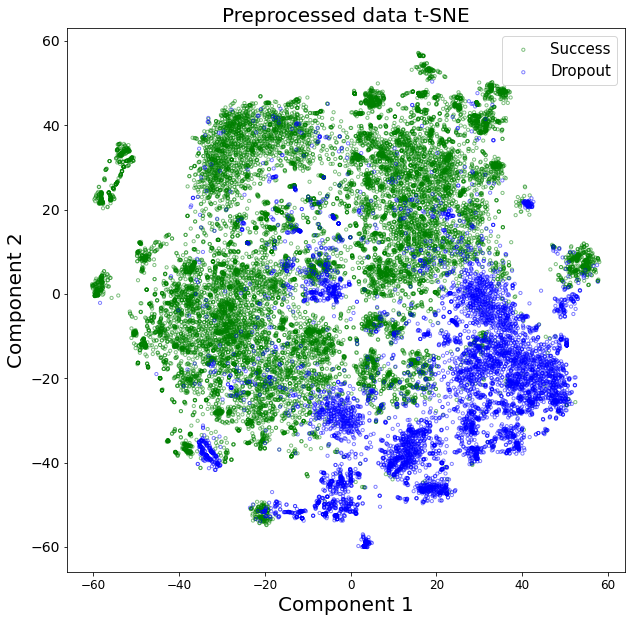

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Component 1',fontsize=20)
plt.ylabel('Component 2',fontsize=20)
plt.title("Preprocessed data t-SNE",fontsize=20)
targets_idx = [0, 1]
targets_name = ["Success", "Dropout"]
colors = ['green', 'blue']
for target, color in zip(targets_idx, colors):
    indicesToKeep = labels == target
    plt.scatter(tsne_evasao_df.loc[indicesToKeep, 'x'],
                tsne_evasao_df.loc[indicesToKeep, 'y'], edgecolors=color, s = 10, alpha=0.5, facecolors='none')

plt.legend(targets_name,prop={'size': 15})